<a href="https://colab.research.google.com/github/AUTO-KKYU/DL/blob/main/Cats_and_Dogs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -qq "/content/drive/MyDrive/catdog.zip"

In [ ]:
import os

path = '/content/train'
os.listdir(path)

['dog.1970.jpg',
 'cat.7985.jpg',
 'dog.11839.jpg',
 'cat.7336.jpg',
 'dog.9281.jpg',
 'dog.3065.jpg',
 'cat.6554.jpg',
 'dog.3888.jpg',
 'dog.6756.jpg',
 'dog.6182.jpg',
 'dog.3617.jpg',
 'cat.3884.jpg',
 'dog.11123.jpg',
 'cat.6134.jpg',
 'cat.10551.jpg',
 'dog.6273.jpg',
 'cat.2878.jpg',
 'dog.10131.jpg',
 'dog.9463.jpg',
 'cat.10902.jpg',
 'cat.8380.jpg',
 'cat.10781.jpg',
 'dog.922.jpg',
 'cat.2068.jpg',
 'dog.11900.jpg',
 'dog.2439.jpg',
 'dog.7827.jpg',
 'cat.6296.jpg',
 'cat.3857.jpg',
 'dog.7819.jpg',
 'cat.2793.jpg',
 'dog.6157.jpg',
 'dog.162.jpg',
 'dog.11935.jpg',
 'cat.7500.jpg',
 'cat.2853.jpg',
 'dog.10253.jpg',
 'cat.1571.jpg',
 'dog.8409.jpg',
 'dog.3527.jpg',
 'cat.275.jpg',
 'cat.5007.jpg',
 'cat.5264.jpg',
 'cat.6820.jpg',
 'cat.398.jpg',
 'cat.10627.jpg',
 'cat.164.jpg',
 'cat.5476.jpg',
 'cat.1940.jpg',
 'cat.6097.jpg',
 'cat.11416.jpg',
 'dog.2412.jpg',
 'cat.1797.jpg',
 'cat.2050.jpg',
 'cat.9824.jpg',
 'cat.7095.jpg',
 'cat.4799.jpg',
 'dog.6482.jpg',
 'dog.92

In [ ]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]

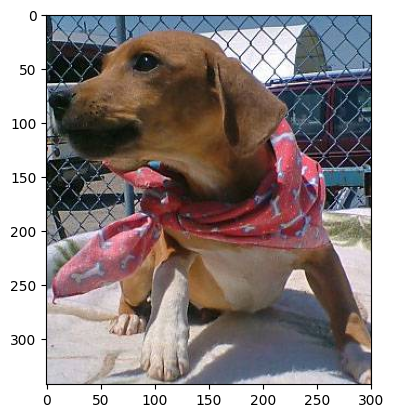

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + '/' +sample)
plt.imshow(image)
plt.show()

In [ ]:
sample = random.choice(full_names)
image = mpimg.imread(path + '/' + sample)
image.shape

(332, 500, 3)

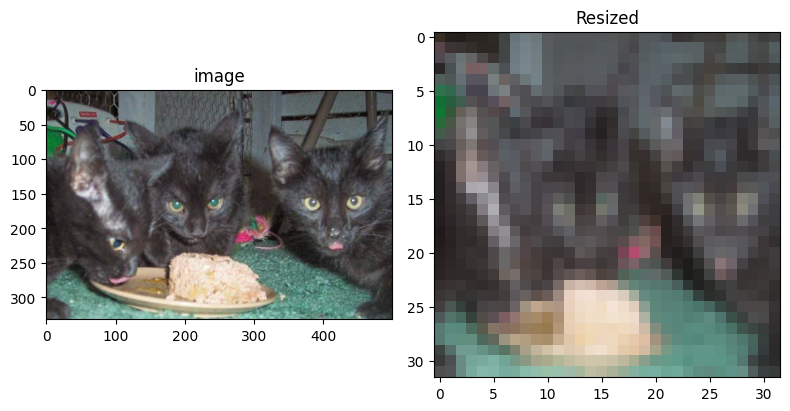

In [ ]:
from skimage.transform import resize
resized = resize(image, (32, 32, 3))

fig, axes = plt.subplots(1, 2, figsize = (8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap = plt.cm.gray)
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

In [ ]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + '/' + file)
    images.append(resize(image, (32, 32, 3)))

images = np.array(images)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
images.shape, labels[:3]

((25000, 32, 32, 3), ['dog', 'cat', 'dog'])

In [ ]:
images[:3]

array([[[[0.1700004 , 0.21507346, 0.16480981],
         [0.17757363, 0.21932984, 0.1703375 ],
         [0.18530714, 0.22168414, 0.16734931],
         ...,
         [0.62136512, 0.73027036, 0.52652756],
         [0.56393426, 0.68371709, 0.4151369 ],
         [0.50230349, 0.61311936, 0.40455476]],

        [[0.07663032, 0.12317909, 0.06364701],
         [0.1140995 , 0.15764205, 0.10018791],
         [0.16636235, 0.2004874 , 0.15251044],
         ...,
         [0.62405862, 0.75742405, 0.50458935],
         [0.5408327 , 0.66604911, 0.42597523],
         [0.44534883, 0.58034467, 0.39020172]],

        [[0.08953049, 0.1244614 , 0.08428735],
         [0.14066741, 0.19449881, 0.13632385],
         [0.19750332, 0.23472572, 0.17711717],
         ...,
         [0.6071109 , 0.7339073 , 0.51150241],
         [0.49517822, 0.59521901, 0.42349706],
         [0.42305016, 0.54334455, 0.35416652]],

        ...,

        [[0.53551875, 0.4960016 , 0.48692229],
         [0.4193037 , 0.30855489, 0.2481842 ]

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 0, 1]), array(['cat', 'dog'], dtype='<U3'))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size = 0.2, random_state = 13, stratify = labels_encoded)

X_train.shape, X_test.shape

((20000, 32, 32, 3), (5000, 32, 32, 3))

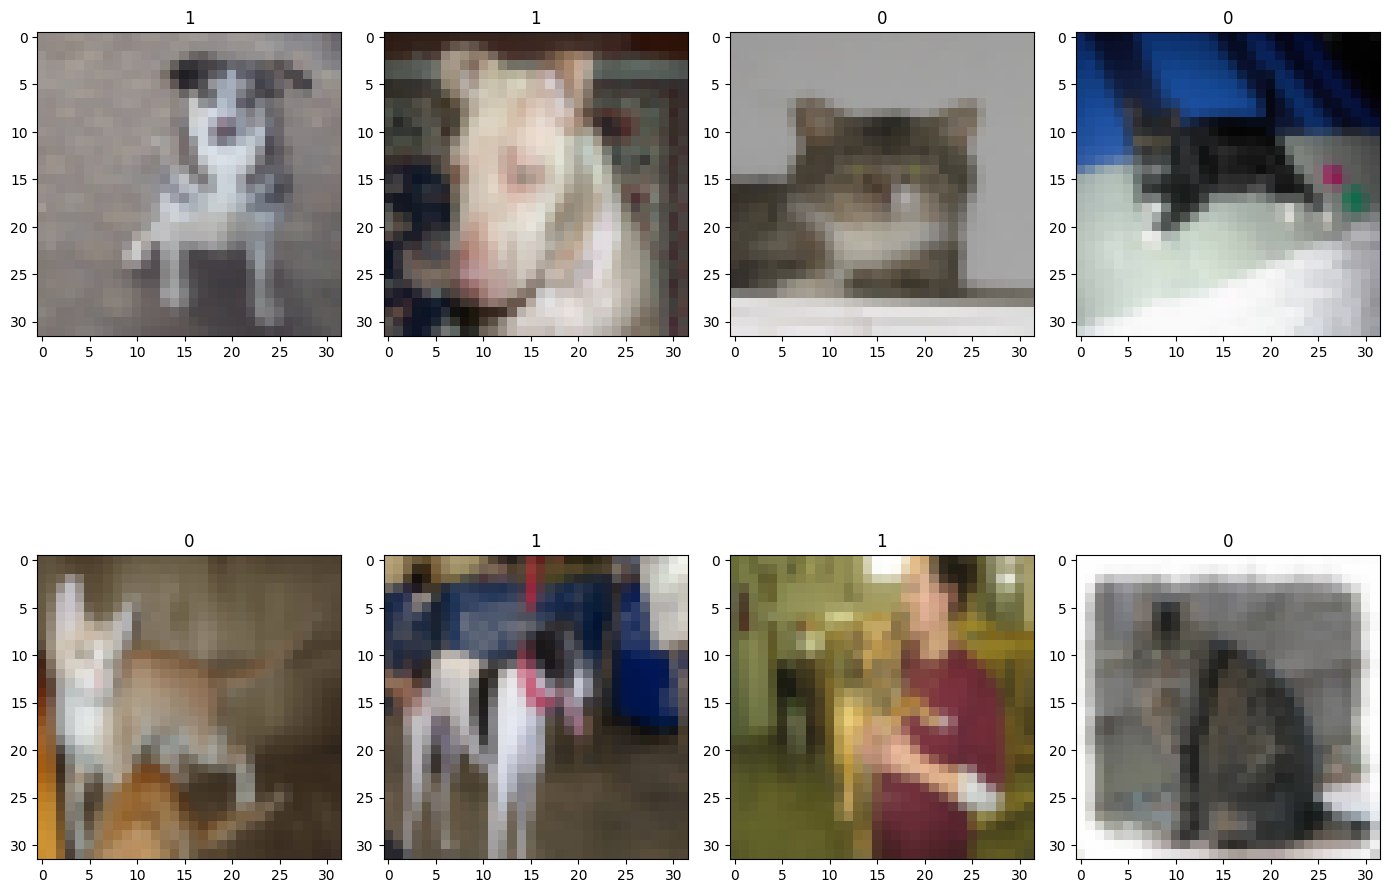

In [ ]:
samples = random.choices(population = range(0, 20000), k = 8)

plt.figure(figsize = (14, 12))
for idx, n in enumerate(samples):
    plt.subplot(2, 4, idx + 1)
    plt.imshow(X_train[n], cmap = 'Greys',
               interpolation = 'nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
import time

start_time = time.time()
hist = model.fit(X_train.reshape(20000, 32, 32, 3), y_train,
                 epochs = 5, verbose = 1,
                 validation_data = (X_test.reshape(5000, 32, 32, 3), y_test))
print("fit time : ", time.time() - start_time)

Epoch 1/5
625/625 [==============================] - 36s 56ms/step - loss: 0.6443 - accuracy: 0.6246 - val_loss: 0.5758 - val_accuracy: 0.7192
Epoch 2/5
625/625 [==============================] - 32s 52ms/step - loss: 0.5570 - accuracy: 0.7146 - val_loss: 0.5276 - val_accuracy: 0.7368
Epoch 3/5
625/625 [==============================] - 33s 52ms/step - loss: 0.5158 - accuracy: 0.7454 - val_loss: 0.4893 - val_accuracy: 0.7640
Epoch 4/5
625/625 [==============================] - 31s 49ms/step - loss: 0.4892 - accuracy: 0.7599 - val_loss: 0.4883 - val_accuracy: 0.7580
Epoch 5/5
625/625 [==============================] - 29s 46ms/step - loss: 0.4678 - accuracy: 0.7790 - val_loss: 0.4656 - val_accuracy: 0.7786
fit time :  203.6944444179535


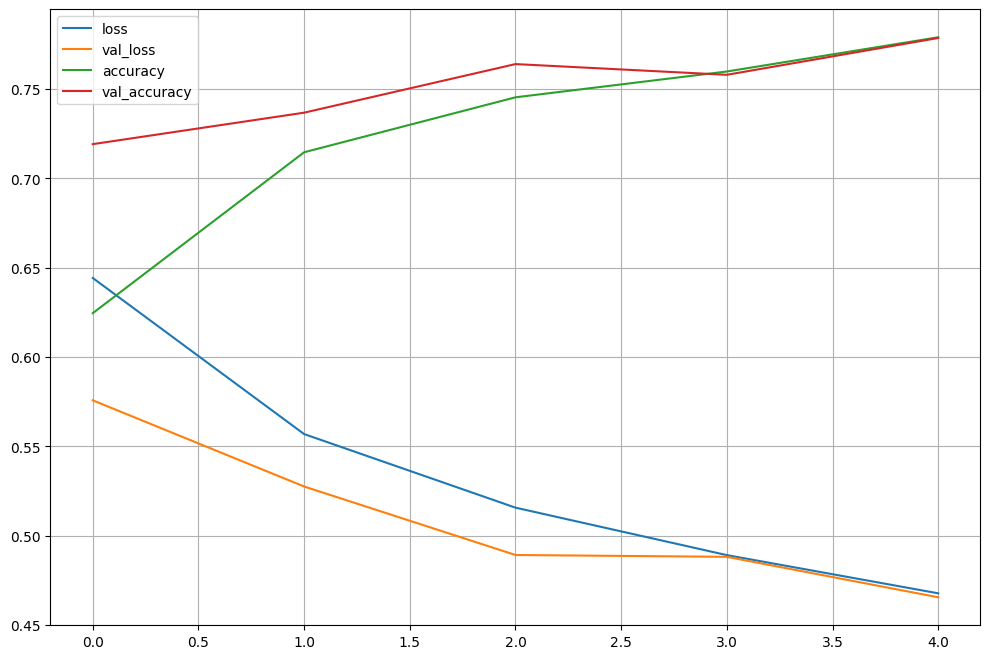

In [ ]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize = (12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)

plt.legend()
plt.grid()
plt.show()